In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Limra Computers/Downloads/Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum().sum()

0

#replacing blank with 0 as tenure is 0  and no total charges are recorded

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df.info()

In [7]:
df['customerID'].duplicated().sum()

0

CONVERT SENIOR CITIZEN VALUE FROM 0 TO NO  AND 1 TO YES

In [8]:
def conv(value):
    if value==1:
        return "yes"
    elif value==0:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

TO CHECK HOW MANY CUSTOMER HAVE  CHURN OUT

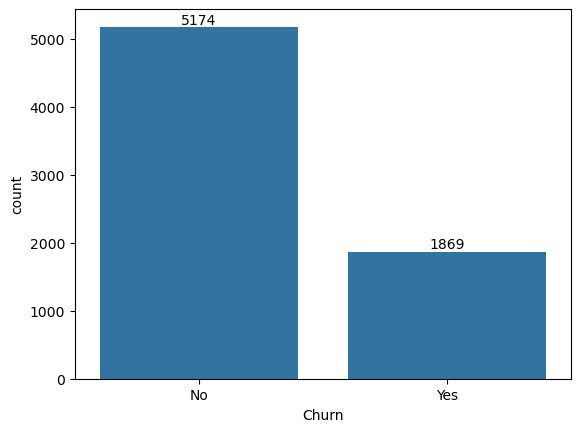

In [9]:
ax=sns.countplot(data=df,x='Churn')
for i in ax.containers:
    ax.bar_label(i)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


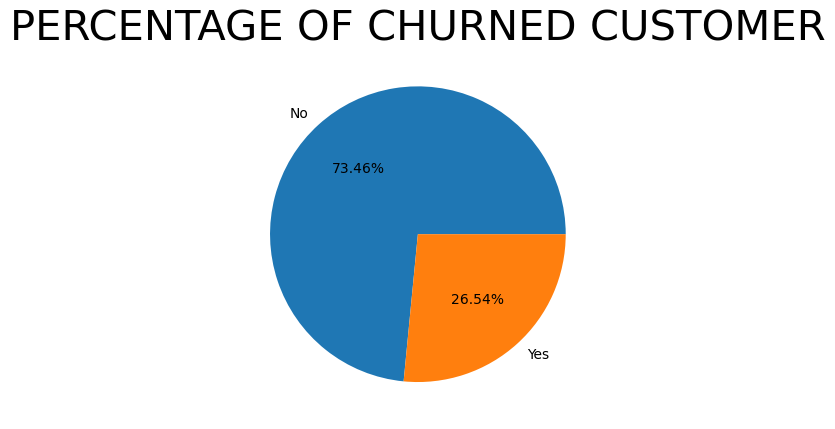

,Churn
Churn,
No,5174
Yes,1869


In [11]:
#GROUPBY BY DATAFRAME 
plt.title('PERCENTAGE OF CHURNED CUSTOMER',fontsize=30)
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()
gb

FOR GIVEN PIE CHART 26.54 PERCENT CUSTOMER HAS CHURNED OUT NOT LETS EXPLORE THE REASON BEHIND IT 

Text(0.5, 1.0, 'CHURN BY GENDER')

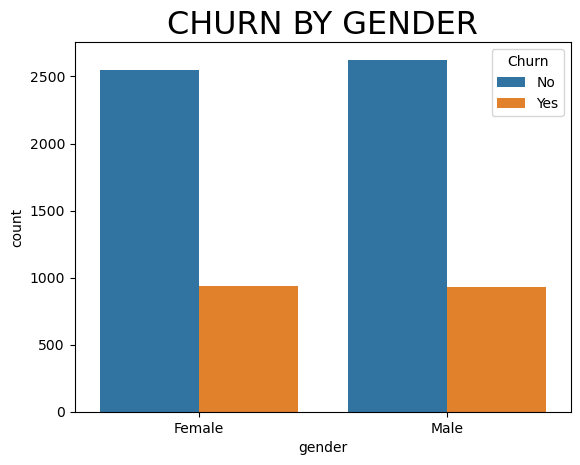

In [12]:
sns.countplot(data=df,hue='Churn',x='gender')
plt.title('CHURN BY GENDER',fontsize=23)

Text(0.5, 1.0, 'CHURN BY SENIORCITIZEN')

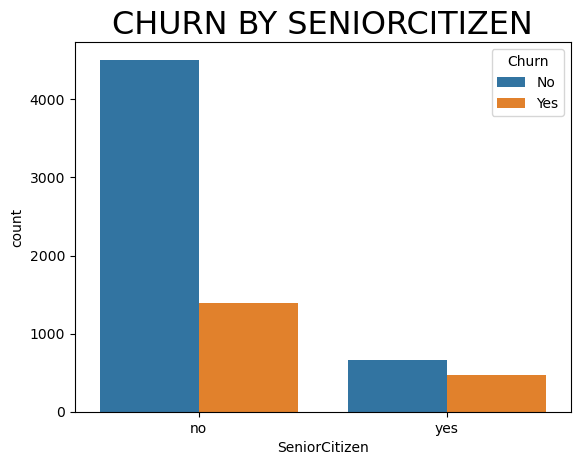

In [13]:
sns.countplot(data=df,hue='Churn',x='SeniorCitizen')
plt.title('CHURN BY SENIORCITIZEN',fontsize=23)

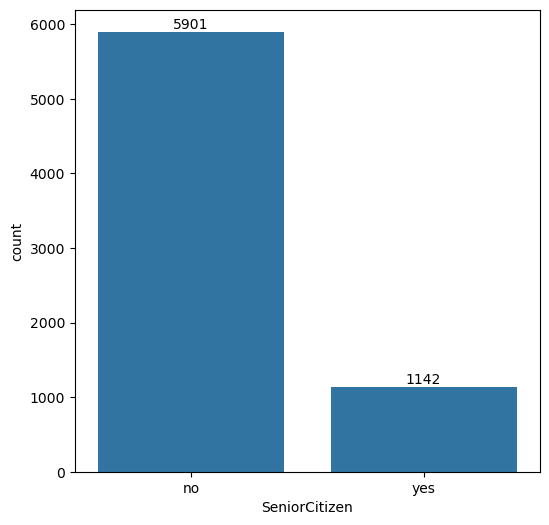

In [14]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=df,x='SeniorCitizen')
for i in ax.containers:
    ax.bar_label(i)

In [15]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

<Axes: xlabel='tenure', ylabel='Count'>

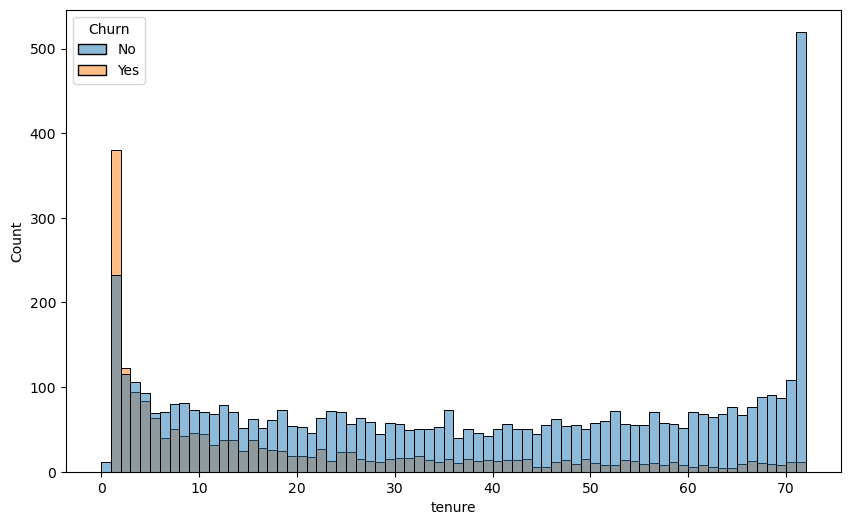

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='tenure',bins=72,hue='Churn')



In [17]:
PEOPLE WHO HAVE USED OUR SERVICES FOR A LONG TIME HAVE STAYED AND PEOPLE WHO  HAVE USED OUR SERVICES MORE THAN  1 OR 2  MONTHS  HAVE CHURNED 

SyntaxError: invalid syntax (26304359.py, line 1)

Text(0.5, 1.0, 'CHURN BY CONTRACT BASE')

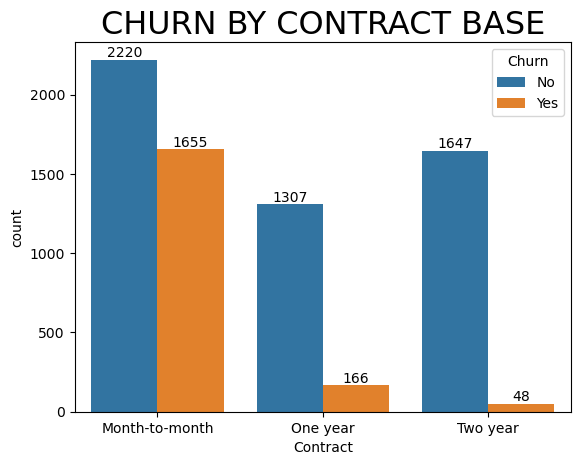

In [19]:
ax=sns.countplot(data=df,hue='Churn',x='Contract')
for i in ax.containers:
    ax.bar_label(i)
plt.title('CHURN BY CONTRACT BASE',fontsize=23)

In [ ]:
PEOPLE WHO  HAVE  MONTH  TO  MONTH CONTRACT ARE LIKELY TO  CHURN  FROM  THOSE WHO HAVE 1  OR  2  YEAR  OF  CONTRACT

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

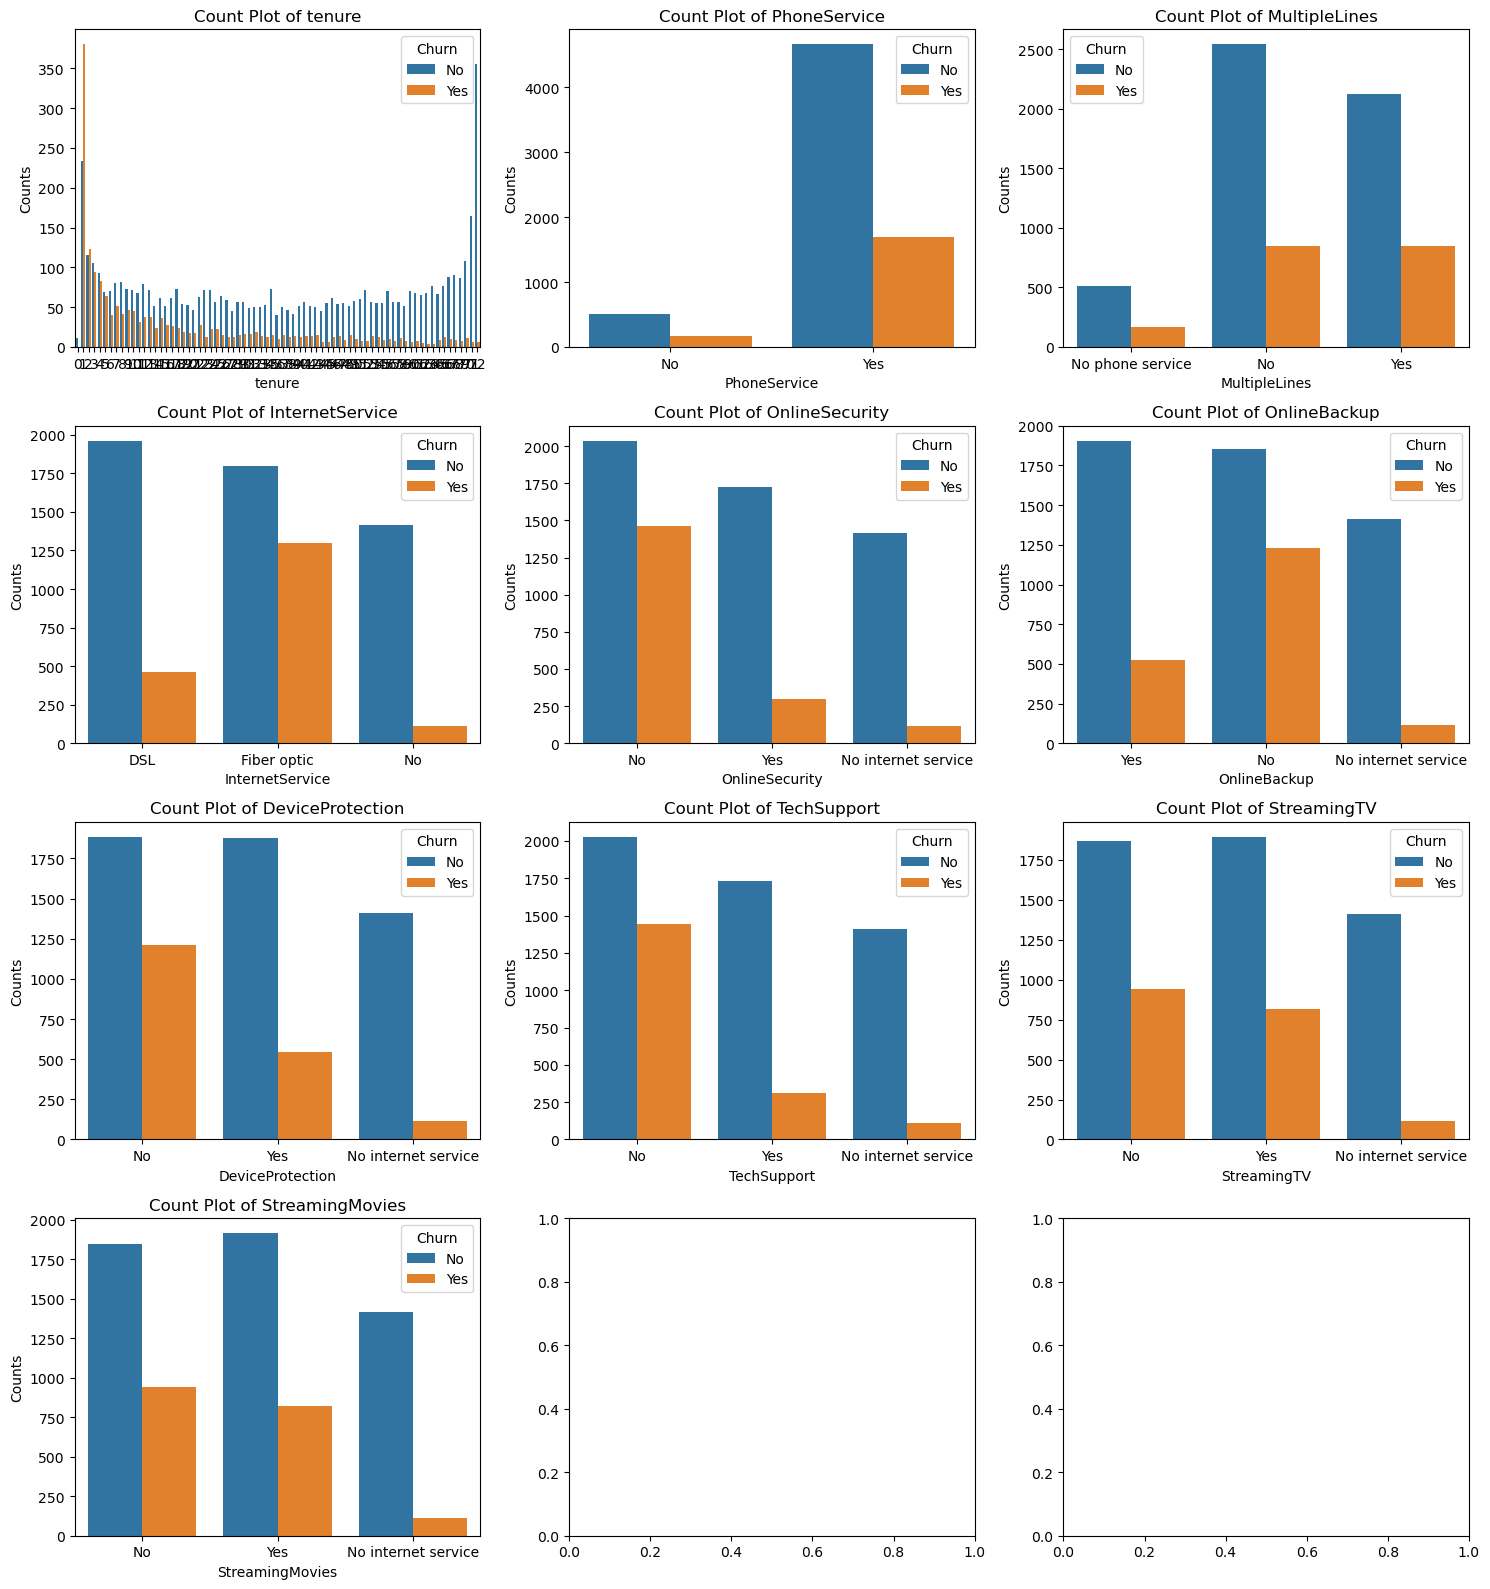

In [29]:
# Assuming you have your data in a pandas dataframe named 'df'
columns = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplot with proper figsize adjustment
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

# Remove empty subplots (if any)
# for j in range(i + 1, len(axes)):
#     fig.delaxies(axes[j])

plt.tight_layout()
plt.show()
    

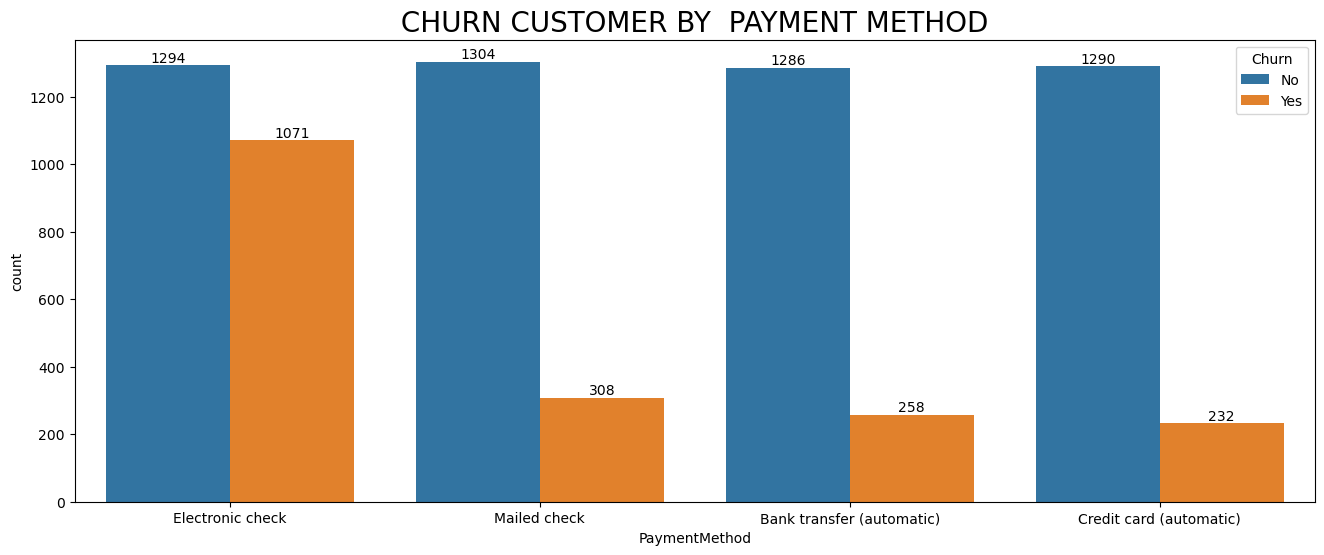

In [42]:
plt.figure(figsize=(16,6))
ax=sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.title(" CHURN CUSTOMER BY  PAYMENT METHOD ",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
CUSTOMER IS LIKELY CHURN WHEN IT USE ELECTRONIC CHECK METHOD 